ARIMA stands for Auto Regressive Integrated Moving Average. ARIMA is one of the most important methods for 
time series forecasting. ARIMA has three parameters: p, d, and q

In [1]:
#ARIMA model of forecasting
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pylab as plt

In [40]:
import yfinance as yf

# Case study 1: Adani stock from NSE

In [2]:
data1=pd.read_csv('C:/Users/RISHI/Desktop/module 4/time series/ADANIENT.NS.csv')


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [68]:
# adani enterprise stock data

data1=yf.download('ADANIENT.NS')

[*********************100%***********************]  1 of 1 completed


In [69]:
print(data1.dtypes)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [70]:
data1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,1.364148,1.401700,1.334259,1.362615,-0.010452,1080397
2002-07-02,1.386372,1.390971,1.356484,1.373344,-0.010535,1016147
2002-07-03,1.371811,1.387139,1.364914,1.373344,-0.010535,980394
2002-07-04,1.379475,1.401700,1.379475,1.381008,-0.010593,972747
2002-07-05,1.388672,1.388672,1.372578,1.377942,-0.010570,974496


In [71]:
data1.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-04,2549.949951,2595.000000,2487.449951,2531.199951,2531.199951,5681516
2023-12-05,2531.199951,2999.899902,2531.199951,2959.350098,2959.350098,22879079
2023-12-06,3080.000000,3154.550049,2844.850098,2883.949951,2883.949951,19355777
2023-12-07,2900.000000,2945.899902,2853.050049,2887.149902,2887.149902,6325887
2023-12-08,2902.699951,2927.000000,2760.000000,2822.149902,2822.149902,6959428


<AxesSubplot:xlabel='Date'>

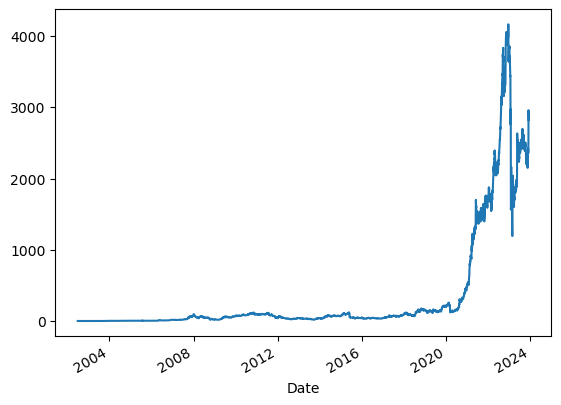

In [72]:
data1['Close'].plot()

In [74]:
data=data1.loc['2019-01-01':][['Close']]
data

,Close
Date,
2019-01-01,157.250000
2019-01-02,154.850006
2019-01-03,152.500000
2019-01-04,152.550003
2019-01-07,151.250000
...,...
2023-12-04,2531.199951
2023-12-05,2959.350098
2023-12-06,2883.949951


In [75]:
data.shape

(1221, 1)

In [76]:
data=data.dropna()

In [77]:
data.shape

(1221, 1)

In [78]:
data.tail()

,Close
Date,
2023-12-04,2531.199951
2023-12-05,2959.350098
2023-12-06,2883.949951
2023-12-07,2887.149902
2023-12-08,2822.149902


In [79]:
data.dtypes

Close    float64
dtype: object

<AxesSubplot:xlabel='Date'>

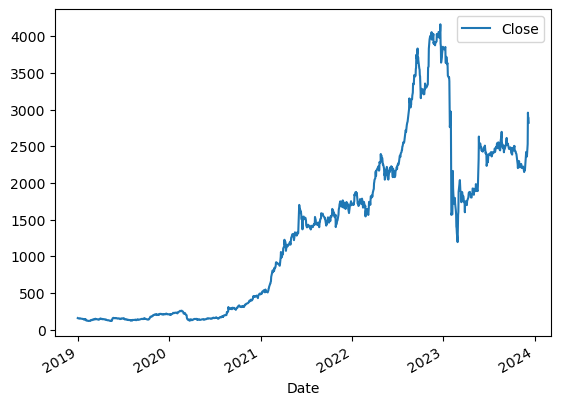

In [80]:
data.plot()

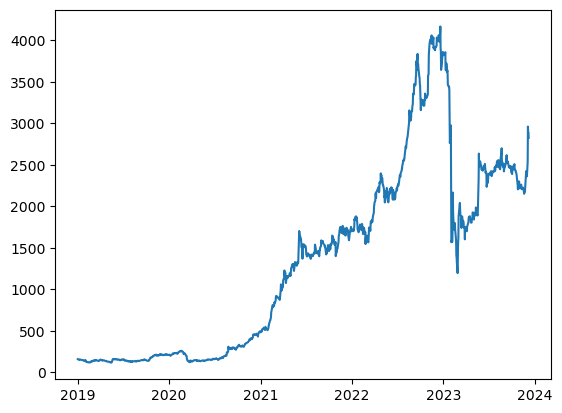

In [81]:
plt.plot(data)

<AxesSubplot:xlabel='Date'>

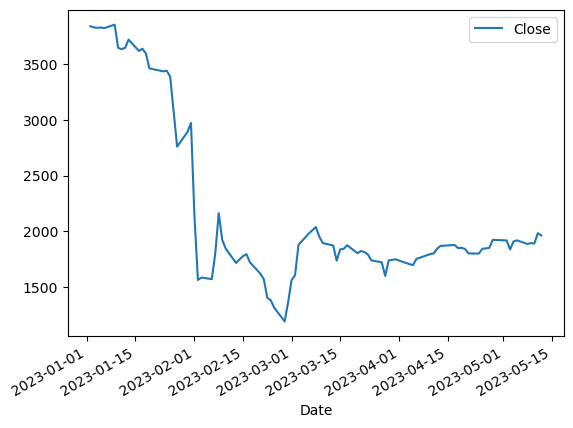

In [82]:
data2['2023-01-01':'05/12/2023'].plot()

#One of the assumption of arima model is that data should be stationary. Stationarity of the data can be checked
through various statistical tests such as: Augmented Dickey-Fuller (ADF), Phillips-Perron (PP) Test etc. The ADF
test is a widely used test to assess the stationarity of a time series. It tests the null hypothesis that a unit 
root is present in the time series. If the p-value of the test is below a certain significance level (e.g., 0.05),
the null hypothesis is rejected, indicating stationarity.

In [83]:
# adf test of stationarity
from statsmodels.tsa.stattools import adfuller

In [84]:
# stationarity test
adf_data=adfuller(data)

In [85]:
# p-value
adf_data[1]

0.7832915851609838

In [86]:
# differencing helps in getting stationarity
# we can use several methods to convert non-stationary data into a stationary one.   Difference, log, etc. can be used.
first_difference=data-data.shift(1)

In [87]:
first_difference.head()

,Close
Date,
2019-01-01,NaN
2019-01-02,-2.399994
2019-01-03,-2.350006
2019-01-04,0.050003
2019-01-07,-1.300003


<AxesSubplot:xlabel='Date'>

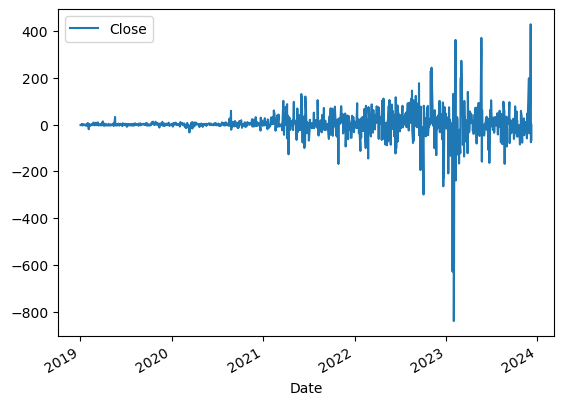

In [88]:
first_difference.plot()

Autocorrelation function (ACF) and Partial Autocorrelation function (PACF)
ACF and PACF gives insight into understanding order of AR and MA model.
ACF: If the ACF plot shows a significant autocorrelation at the first lag (lag 1) 
and a gradual decline afterwards, it suggests the presence of an autoregressive component (AR)
in the model. 
PACF: If the PACF plot shows a significant partial autocorrelation at the first 
lag (lag 1) and a gradual decline afterwards, it suggests the presence of a moving average component (MA) in the model.

In [89]:
#determining order of AR and MA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

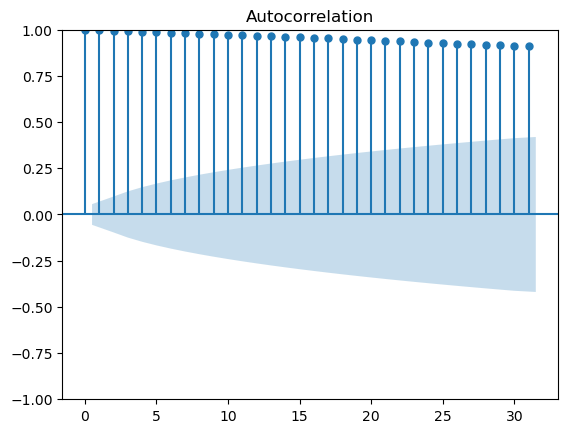

In [91]:
acfPlot=plot_acf(data)

C:\Users\RISHI\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


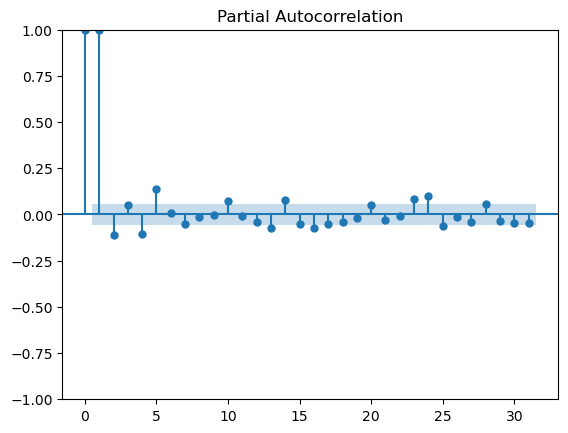

In [92]:
PacfPlot=plot_pacf(data)

In [93]:
data.shape

(1221, 1)

In [94]:
# divide data into traing and testing
# In tsa i.e time series analysis, training and testing data can't be randomly selected as data has to be selected in a series .
# So we take first 800 to be training and last 200 to be testing .

# When we used test_train_split , we were randomly selecting data on its own which we can't do here.

len(data)*.8

976.8000000000001

In [96]:
train=data[:1000]

In [97]:
train.shape

(1000, 1)

In [98]:
train.tail(4)

,Close
Date,
2023-01-10,3646.899902
2023-01-11,3635.800049
2023-01-12,3647.199951
2023-01-13,3721.149902


In [99]:
test=data[1000:]

In [100]:
test.shape

(221, 1)

In [101]:
test.head()

,Close
Date,
2023-01-16,3619.800049
2023-01-17,3639.350098
2023-01-18,3596.699951
2023-01-19,3463.550049
2023-01-20,3456.149902


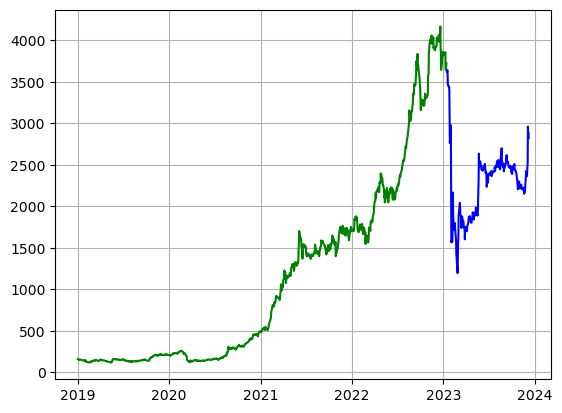

In [102]:
# plot train and test data 
plt.grid()
plt.plot(train, 'green')
plt.plot(test, 'blue')

In [103]:
# knowing AR order and MA order is a tricky affair. auto_arima from pmdarima suggests best p, d, and q
# ARIMA : Auto Regressive I Moving Average

In [104]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [105]:
from pmdarima import auto_arima

In [123]:
model1=auto_arima(train, start_p=0,start_d=0, start_q=0)

C:\Users\RISHI\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [124]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -5094.837
Date:                Sun, 10 Dec 2023   AIC                          10201.673
Time:                        07:35:08   BIC                          10231.108
Sample:                             0   HQIC                         10212.862
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9285      0.019    -48.646      0.000      -0.966      -0.891
ar.L2         -0.7502      0.023    -32.465      0.000      -0.796      -0.705
ar.L3         -0.5385      0.027    -20.159      0.000      -0.591      -0.486
ar.L4         -0.3475      0.027    -13.029      0.000      -0.400      -0.295
ar.L5         -0.1479      0.022     -6.713      0.000      -0.191      -0.105
sigma2      1589.3102     31.372     50.661      0.000    1527.823    1650.797
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):              4101.34
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):             130.52   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# develop an auto_arima model
#model1=auto_arima(data,trace=True)

In [286]:
#model1.summary()

In [287]:
from statsmodels.tsa.arima.model import ARIMA 

In [288]:
#model=ARIMA(train['Close'], order = (4,1,0)).fit()

In [289]:
model=ARIMA(train, order = (5,2,0)).fit()

In [290]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1000
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -5094.837
Date:                Sun, 10 Dec 2023   AIC                          10201.673
Time:                        09:19:30   BIC                          10231.108
Sample:                             0   HQIC                         10212.862
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9285      0.019    -48.646      0.000      -0.966      -0.891
ar.L2         -0.7502      0.023    -32.465      0.000      -0.796      -0.705
ar.L3         -0.5385      0.027    -20.159      0.0

In [291]:
# make prediction for test data
forecast_test=model.predict(start=len(train), end=1221,dynamic=True)

In [292]:
forecast=model.forecast(steps=len(test))

In [296]:
forecast

1000    3691.698314
1001    3666.064415
1002    3643.772508
1003    3646.128748
1004    3647.718944
           ...     
1216    2157.270292
1217    2150.254773
1218    2143.239254
1219    2136.223735
1220    2129.208216
Name: predicted_mean, Length: 221, dtype: float64

<AxesSubplot:>

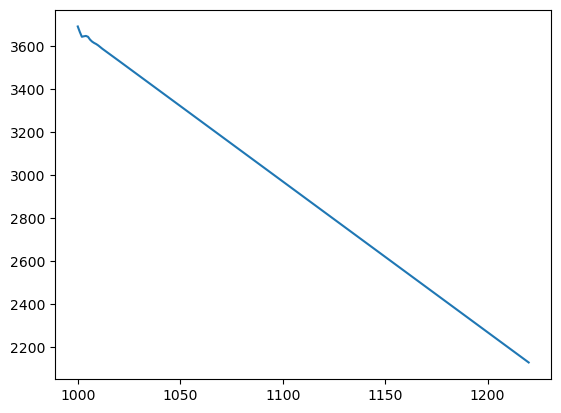

In [297]:
forecast.plot()

<AxesSubplot:xlabel='Date'>

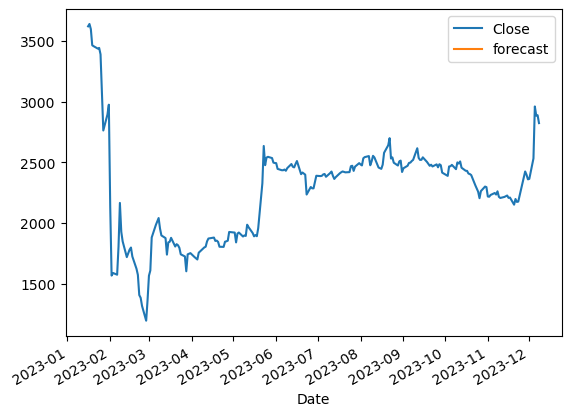

In [301]:
test.plot()


forecasting can be improved by bringing seasonality in the model
SARIMA- seasonal arima

In [302]:
import statsmodels.api as sm

In [303]:
model2=sm.tsa.statespace.SARIMAX(data['Close'], order=(5,2,0), seasonal_order=(5,2,0,7))

In [304]:
results2=model2.fit()


In [305]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Close   No. Observations:                 1221
Model:             SARIMAX(5, 2, 0)x(5, 2, 0, 7)   Log Likelihood               -6991.665
Date:                           Sun, 10 Dec 2023   AIC                          14005.331
Time:                                   09:23:43   BIC                          14061.367
Sample:                                        0   HQIC                         14026.435
                                          - 1221                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7414      0.013    -58.293      0.000      -0.766      -0.716
ar.L2         -0.6766      0.017    -39.933      0.000      -0.710      -0.643
ar.L3         -0.4625      0.019    -24.885      0.000      -0.499      -0.426
ar.L4         -0.3445      0.015    -23.124      0.000      -0.374      -0.315
ar.L5         -0.2027      0.014    -14.621      0.000      -0.230      -0.176
ar.S.L7       -1.4871      0.014   -109.283      0.000      -1.514      -1.460
ar.S.L14      -1.5065      0.021    -70.476      0.000      -1.548      -1.465
ar.S.L21      -1.2450      0.027    -46.331      0.000      -1.298      -1.192
ar.S.L28      -0.7778      0.029    -27.160      0.000      -0.834      -0.722
ar.S.L35      -0.2989      0.020    -15.293      0.000      -0.337      -0.261
sigma2      6308.0940     94.801     66.540      0.000    6122.287    6493.901
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):             22001.83
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):             236.01   Skew:                            -0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [306]:
# Get the predicted values for the entire dataset
fitted_values = results2.fittedvalues


In [307]:
# alternatively, can be obtained as follows:
fitted=results2.predict()

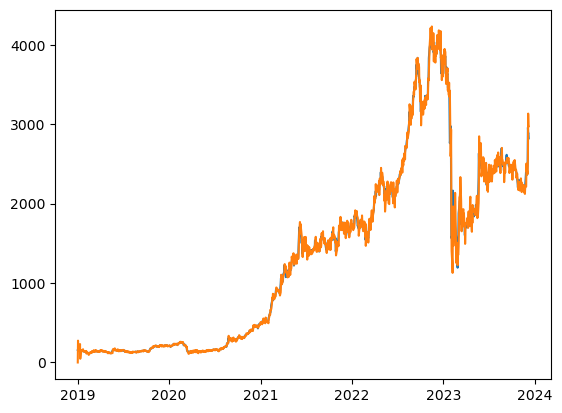

In [308]:
plt.plot(data)
plt.plot(fitted)

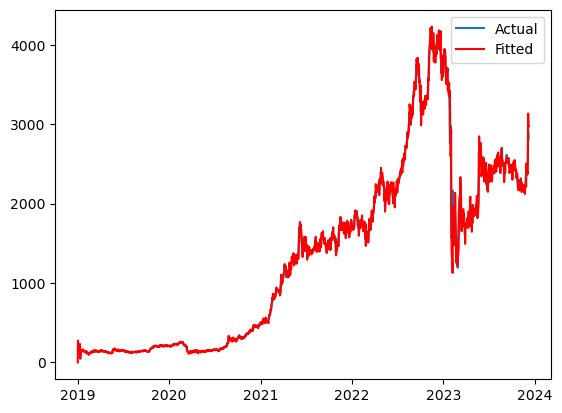

In [309]:
plt.plot(data, label='Actual')
plt.plot(fitted_values, color='red', label='Fitted')
plt.legend()

In [310]:
pred_100=results2.forecast(steps=100)

<AxesSubplot:>

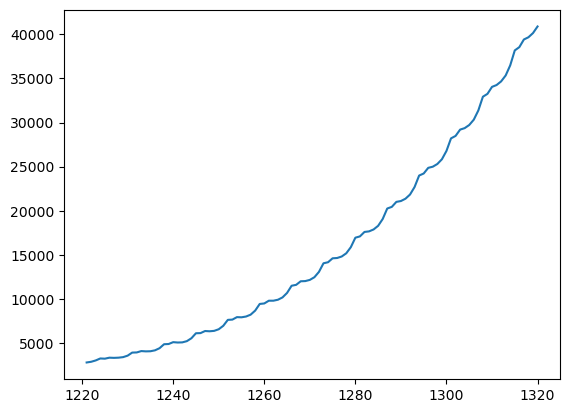

In [311]:
pred_100.plot()

In [313]:
forecast1 = results2.get_forecast(steps=100)
predicted_values = forecast1.predicted_mean
confidence_intervals = forecast1.conf_int()

In [314]:
print(predicted_values)

1221     2823.917240
1222     2904.684230
1223     3056.640184
1224     3278.362333
1225     3254.441735
            ...     
1316    38535.156825
1317    39401.308506
1318    39654.371364
1319    40127.219638
1320    40874.984844
Name: predicted_mean, Length: 100, dtype: float64


# Another case study
data: Airpassengers 

In [209]:
df=pd.read_csv('C:/Users/RISHI/Desktop/module 4/time series/AirPassengers.csv')
print(df.dtypes)

Month         object
Passengers     int64
dtype: object


In [210]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<AxesSubplot:>

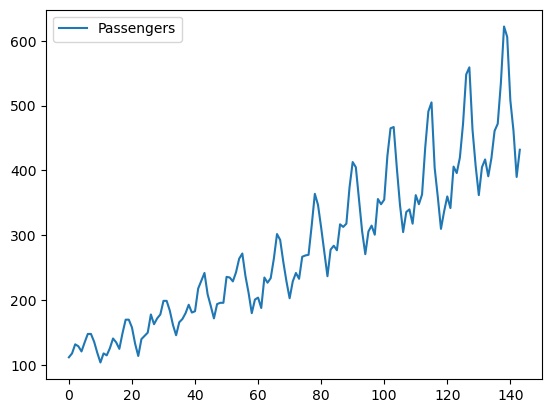

In [211]:
df.plot()

In [212]:
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index(['Month'])
print(df.dtypes)

Passengers    int64
dtype: object


<AxesSubplot:xlabel='Month'>

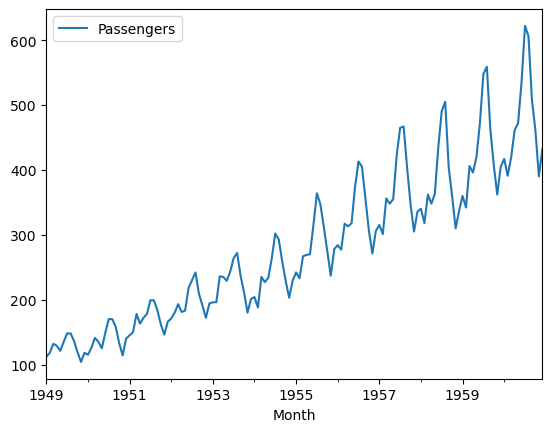

In [213]:
df.plot()

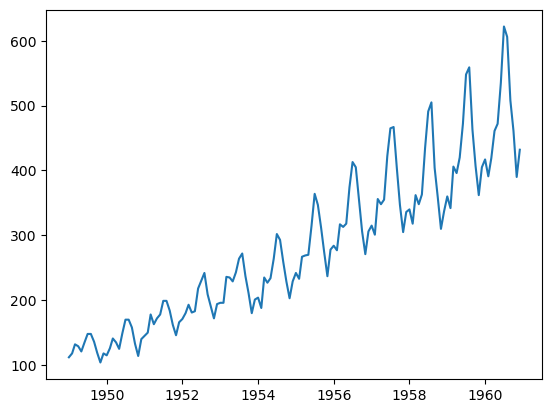

In [214]:
plt.plot(df['Passengers'])

In [215]:
#Test of stationarity
#H0: data is stationary
from statsmodels.tsa.stattools import adfuller

In [216]:
adTest=adfuller(df['Passengers'])

In [217]:
adTest

(0.8153688792060457,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [218]:
adTest[1]

0.991880243437641

In [219]:
# decomposition of a time series data
from statsmodels.tsa.seasonal import seasonal_decompose
output = seasonal_decompose(df, model="additive",period=12)
output

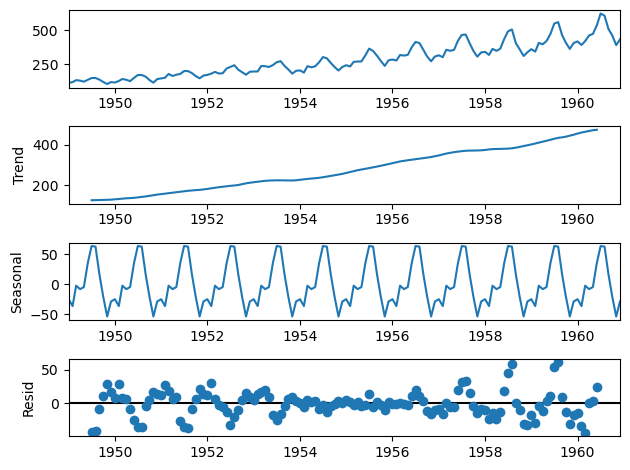

In [220]:
output.plot()
plt.show()

In [221]:
df['first difference']=df['Passengers']-df['Passengers'].shift(12)

In [222]:
df

,Passengers,first difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1960-08-01,606,47.0
1960-09-01,508,45.0
1960-10-01,461,54.0


In [223]:
adTest1=adfuller(df['first difference'].dropna())

In [224]:
adTest1[1]

0.011551493085514952

<AxesSubplot:xlabel='Month'>

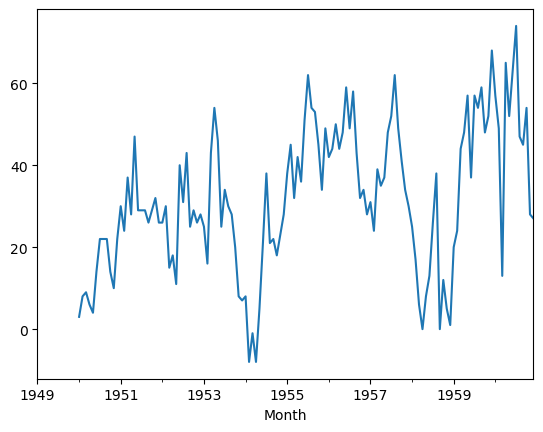

In [225]:
df['first difference'].plot()

In [229]:
model3=auto_arima(df['Passengers'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [230]:
model3

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [231]:
#determining order of AR and MA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

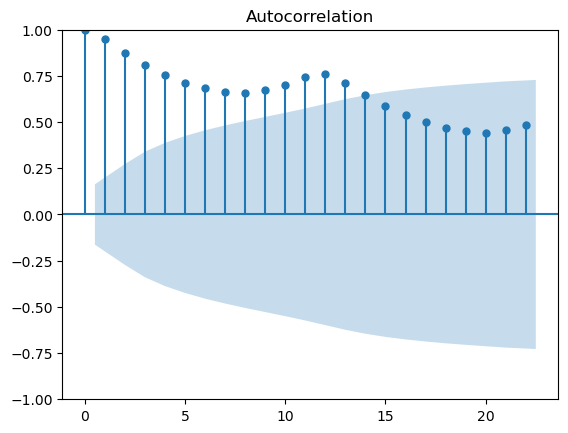

In [232]:
acfPlot=plot_acf(df['Passengers'].dropna())

C:\Users\RISHI\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


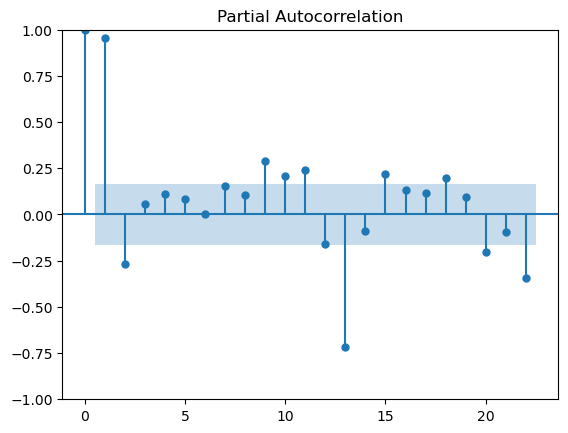

In [233]:
PacfPlot=plot_pacf(df['Passengers'].dropna())

In [234]:
import statsmodels.api as sm

In [267]:
#import warnings
#warnings.filterwarnings('ignore')

In [270]:
model=sm.tsa.statespace.SARIMAX(df['Passengers'], order=(4,1,3), seasonal_order=(4,1,3,12))

In [271]:
results=model.fit()

In [272]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(4, 1, 3)x(4, 1, 3, 12)   Log Likelihood                -489.973
Date:                            Sun, 10 Dec 2023   AIC                           1009.947
Time:                                    08:56:27   BIC                           1053.075
Sample:                                01-01-1949   HQIC                          1027.471
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3478      0.114     -3.038      0.002      -0.572      -0.123
ar.L2         -0.1526      0.117     -1.300      0.193      -0.383       0.077
ar.L3          0.7652      0.123      6.230      0.000       0.524       1.006
ar.L4          0.0781      0.114      0.683      0.495      -0.146       0.302
ma.L1         -0.0516      0.594     -0.087      0.931      -1.216       1.113
ma.L2          0.0978      0.636      0.154      0.878      -1.149       1.344
ma.L3         -0.9713      1.137     -0.855      0.393      -3.199       1.256
ar.S.L12       0.1290      0.720      0.179      0.858      -1.281       1.539
ar.S.L24       0.7408      0.524      1.415      0.157      -0.286       1.767
ar.S.L36      -0.0566      0.805     -0.070      0.944      -1.635       1.521
ar.S.L48       0.1744      0.294      0.594      0.553      -0.401       0.750
ma.S.L12      -0.5805      0.633     -0.917      0.359      -1.821       0.660
ma.S.L24      -0.7359      0.812     -0.906      0.365      -2.328       0.857
ma.S.L36       0.4384      0.823      0.533      0.594      -1.175       2.052
sigma2        78.8844    101.884      0.774      0.439    -120.804     278.573
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.01
Prob(Q):                              0.93   Prob(JB):                         0.08
Heteroskedasticity (H):               2.27   Skew:                             0.13
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [273]:
len(df)

144

In [274]:
df.shape

(144, 4)

In [275]:
df['forecast']=results.predict(start=100,end=144, dynamic=True)


In [276]:
df

,Passengers,first difference,forecast,pred
Month,,,,
1949-01-01,112,NaN,NaN,0.000000
1949-02-01,118,NaN,NaN,111.996464
1949-03-01,132,NaN,NaN,117.999993
1949-04-01,129,NaN,NaN,132.000078
1949-05-01,121,NaN,NaN,128.998138
...,...,...,...,...
1960-08-01,606,47.0,577.575276,612.626896
1960-09-01,508,45.0,514.712593,507.315676
1960-10-01,461,54.0,457.042112,459.459225


<AxesSubplot:xlabel='Month'>

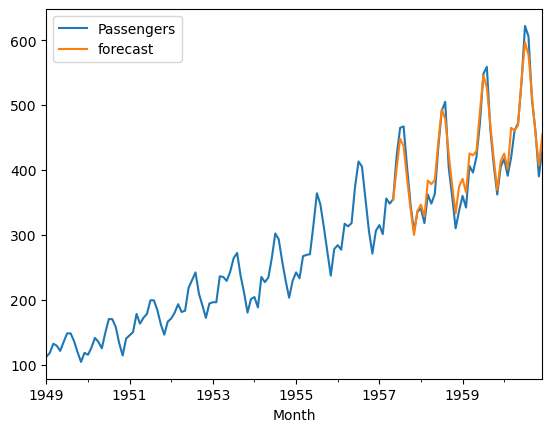

In [277]:
df[['Passengers', 'forecast']].plot()

In [278]:
#forecasting 24 months into future
pred_24=results.forecast(steps=24)

<AxesSubplot:xlabel='Month'>

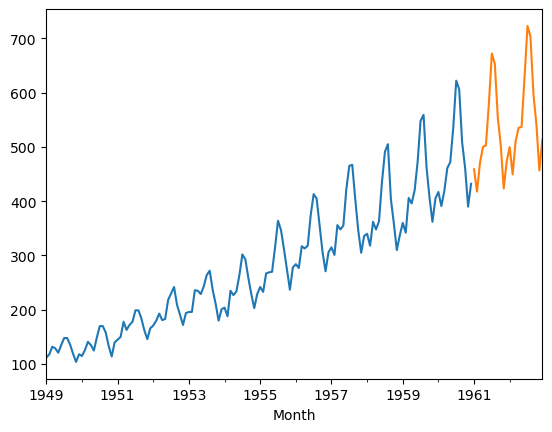

In [279]:
df['Passengers'].plot()
pred_24.plot()

In [280]:
results.predict()

1949-01-01      0.000000
1949-02-01    111.996464
1949-03-01    117.999993
1949-04-01    132.000078
1949-05-01    128.998138
                 ...    
1960-08-01    612.626896
1960-09-01    507.315676
1960-10-01    459.459225
1960-11-01    397.224217
1960-12-01    435.617153
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64

<AxesSubplot:xlabel='Month'>

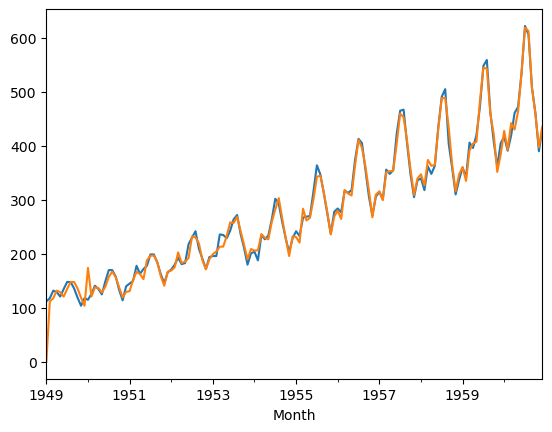

In [281]:
df['Passengers'].plot()
results.predict().plot()

In [282]:
# model evaluation
#Root mean square error
from sklearn.metrics import mean_squared_error 


In [283]:
df['pred']=results.predict()
df

,Passengers,first difference,forecast,pred
Month,,,,
1949-01-01,112,NaN,NaN,0.000000
1949-02-01,118,NaN,NaN,111.996464
1949-03-01,132,NaN,NaN,117.999993
1949-04-01,129,NaN,NaN,132.000078
1949-05-01,121,NaN,NaN,128.998138
...,...,...,...,...
1960-08-01,606,47.0,577.575276,612.626896
1960-09-01,508,45.0,514.712593,507.315676
1960-10-01,461,54.0,457.042112,459.459225


In [284]:
MSE=mean_squared_error(df['Passengers'][1:],df['pred'][1:])
MSE

125.7654201541321

In [285]:
RMSE=np.sqrt(MSE)
RMSE

11.214518275616305

Mean Squared Error (MSE) is a commonly used metric in forecasting to evaluate the accuracy and 
performance of a forecasting model. It quantifies the average squared difference between the 
predicted values and the actual values of a time series.